In [1]:
from sklearn import datasets ,model_selection ,preprocessing ,linear_model ,metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("housing_data.csv")
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   square_footage           1000 non-null   int64  
 1   bedrooms                 1000 non-null   int64  
 2   bathrooms                1000 non-null   float64
 3   year_built               1000 non-null   int64  
 4   distance_to_city_center  1000 non-null   float64
 5   has_garage               1000 non-null   int64  
 6   price                    1000 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 54.8 KB
None
       square_footage     bedrooms    bathrooms   year_built  \
count     1000.000000  1000.000000  1000.000000  1000.000000   
mean      2009.162000     3.191000     1.990500  1985.096000   
std        489.602333     0.862127     0.551329    20.152044   
min        379.000000     2.000000     1.000000  1950.000000   
25%       1675.500000     3.00000

In [3]:
x = df.iloc[:, :-1]
x_original = df.iloc[:, :-1] 
y = df.iloc[:, -1] 

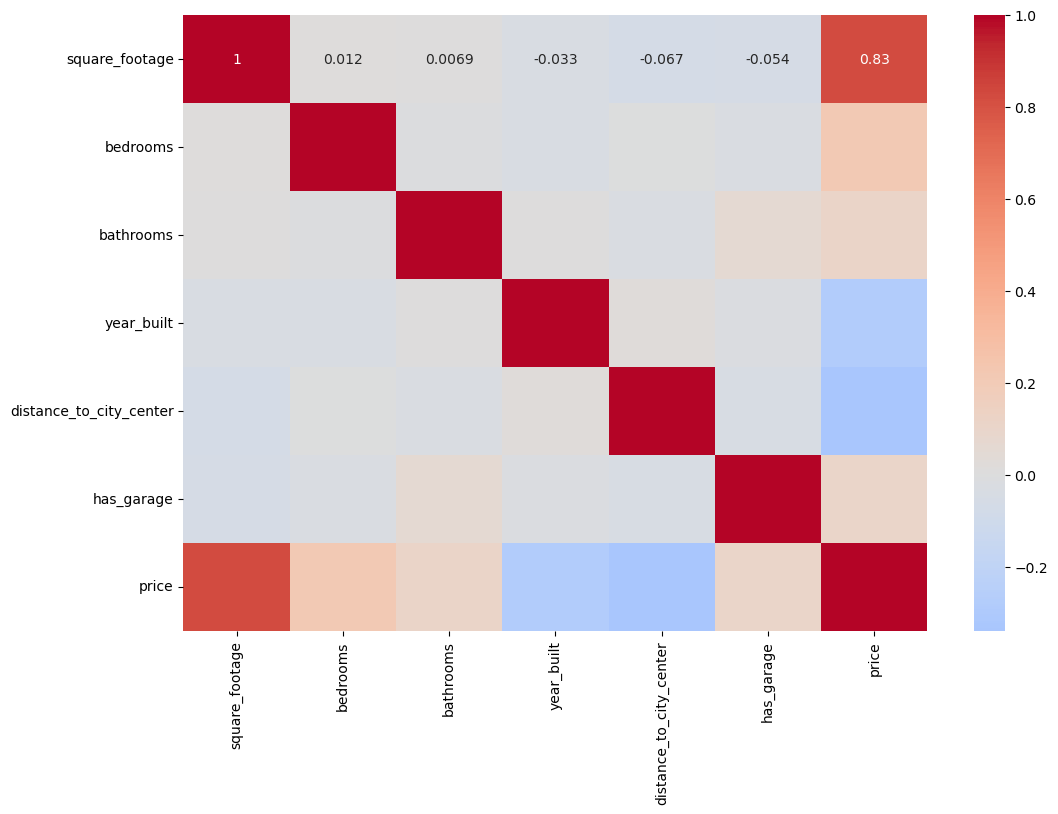

price                      1.000000
square_footage             0.825564
bedrooms                   0.211857
bathrooms                  0.114707
has_garage                 0.104428
year_built                -0.283055
distance_to_city_center   -0.338972
Name: price, dtype: float64


In [4]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.show()

if 'price' in df.columns:
    print(df.corr()['price'].sort_values(ascending=False))

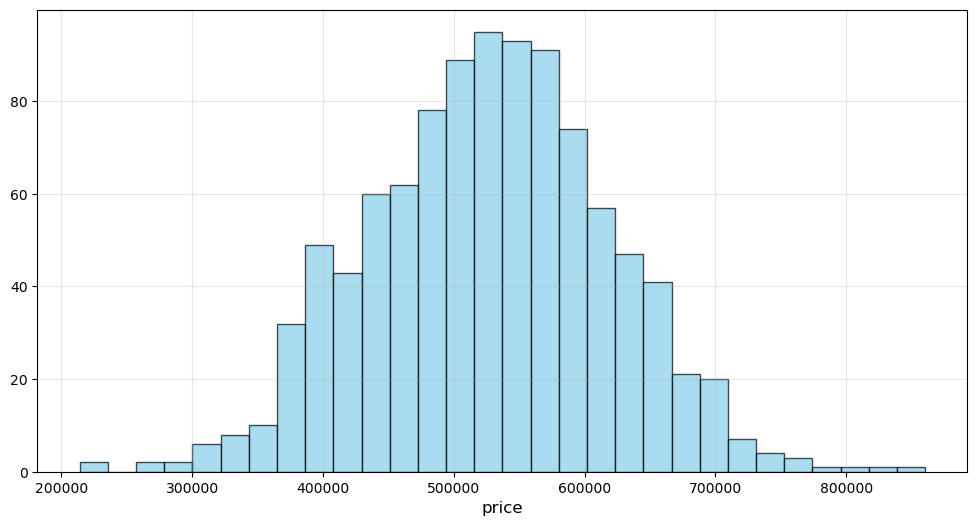

In [5]:
plt.figure(figsize=(12, 6))
plt.hist(df["price"], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('price', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

In [6]:
scalerx = preprocessing.StandardScaler()
x_scaled = scalerx.fit_transform(x)

x_train, x_test, y_train, y_test = model_selection.train_test_split(
    x_scaled, y, test_size=0.5, random_state=42  
)

In [7]:
model_linear = linear_model.LinearRegression()
model_linear.fit(x_train, y_train)
y_pred_linear = model_linear.predict(x_test)

In [8]:
test = np.array([1800, 3, 2, 1995, 3.5, 1])
test_df = pd.DataFrame([test], columns=x_original.columns)
test_scaled = scalerx.transform(test_df)
test_pred = model_linear.predict(test_scaled)

print(f"{test_pred[0]:,.2f}")

494,514.91
